In [35]:
#import all the necessary libraries and modules
import pandas as pd
import numpy as np
import random
import networkx as nx
#from tqdm import tqdm
#import re
import matplotlib.pyplot as plt
import csv

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from node2vec import Node2Vec
from sklearn.cluster import KMeans
from node2vec.edges import HadamardEmbedder

In [2]:
# load nodes details
with open("train.txt") as f:
    reader = csv.reader(f, delimiter = "\t")
    train_nodes = list(reader)
print(len(train_nodes))
#print(train_nodes[0])

#clone 
#train_nodes_clone = train_nodes
#print(train_nodes_clone[0])
    

20000
['540762', '1912140', '1537559', '3091331', '2757277', '3237295', '1070876', '4008078', '1824878', '1005927', '2703564', '2519640', '3370407', '3883660', '2173241', '1726071', '2451654', '3906434', '2635670', '3294915', '2763417', '1116703', '261881', '2404108', '3521384', '2299939', '2989624', '4361289', '3314815', '3367669', '641925', '2862019', '1274046', '4316209', '2463912', '3043', '952976', '3532986', '415955', '4366854', '267263', '1199298', '1840280', '581535', '4241326', '4267183', '2881471', '2737722', '4286284', '333573', '1594907', '3056533', '2163471', '3712732', '2672578', '1209171', '1003239', '4818002', '3201437', '1892251', '2800259', '141083', '2558493', '1655093', '4313335', '738638', '3702208', '1124524', '1436216', '3206499', '1462439', '2345899', '4131275', '1169783', '2152173', '4174165', '141067', '3118623', '1521082', '3912913', '299865', '193736', '3562621', '94742', '2464827', '1719625', '557514', '1313296', '2329535', '3662772', '3980998', '695775', '

In [3]:
mydict = {}
for node_line in train_nodes_clone:
    key = node_line.pop(0)
    mydict[key] = node_line




In [4]:
#print(len(mydict['540762']))

143


In [5]:
#form our source and target nodes list
node_list1 = []
node_list2 = []
for key,val in mydict.items():
    for i in range(len(val)):
        node_list1.append(key)
        node_list2.append(val[i])
    



In [6]:
network_df = pd.DataFrame({'source':node_list1, 'sink':node_list2})
network_df.shape

(24004361, 2)

In [7]:
network_df.head()

source     sink
0  540762  1912140
1  540762  1537559
2  540762  3091331
3  540762  2757277
4  540762  3237295

In [20]:
network_df_sample = network_df.sample(frac = 0.0001)
network_df_sample.shape

(2400, 2)

In [21]:
node_list1_sampled = list(network_df_sample['source'])
node_list2_sampled = list(network_df_sample['sink'])
node_pairs = list(zip(node_list1_sampled,node_list2_sampled))

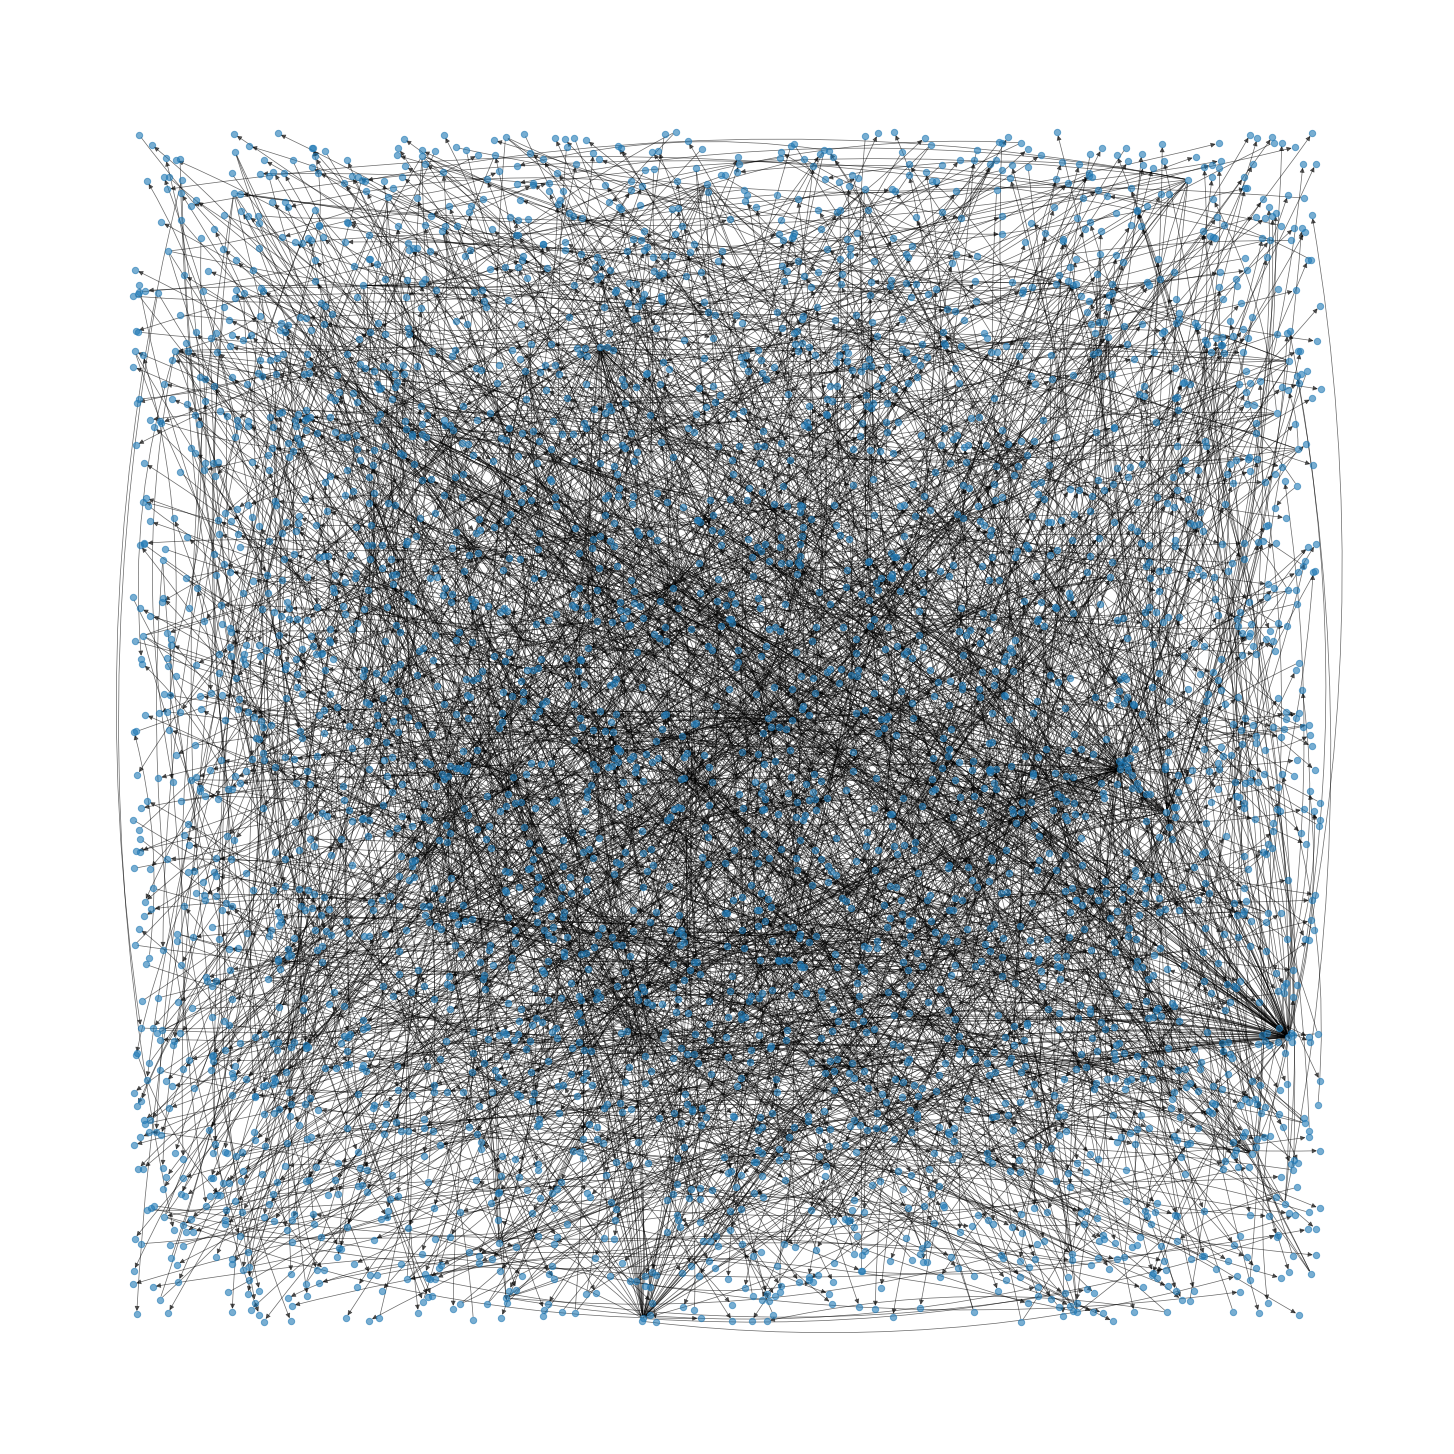

In [23]:

G = nx.from_pandas_edgelist(network_df_sample,source='source',target='sink', edge_attr=None, create_using=nx.DiGraph())


# plot graph

plt.figure(figsize=(20,20))
pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7, connectionstyle='arc3, rad = 0.1')

plt.show()



In [25]:
# combine all nodes in a list
node_list = node_list1_sampled + node_list2_sampled

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

# build adjacency matrix
adj_G = nx.to_numpy_matrix(G, node_list)
adj_G.shape

(3538, 3538)

In [34]:
print(node_pairs)

[('1705425', '3006327'), ('1606469', '789459'), ('2949409', '2012445'), ('3215649', '4764269'), ('92352', '1224426'), ('3676295', '3646581'), ('4272102', '670144'), ('1580988', '3346354'), ('2306134', '407457'), ('3509903', '4157104'), ('687713', '4311381'), ('681618', '925886'), ('932720', '865136'), ('2950311', '1124270'), ('1384528', '4631135'), ('3271484', '3273453'), ('765601', '4857129'), ('3361377', '1426477'), ('4210728', '1758707'), ('1196844', '4241470'), ('781211', '247621'), ('2827436', '1784099'), ('3397281', '2014268'), ('2827436', '2850003'), ('1532833', '1532566'), ('2397149', '4761719'), ('1234540', '1857264'), ('4191410', '4082521'), ('3023130', '4558323'), ('415521', '1074854'), ('3509903', '2254788'), ('575638', '3323390'), ('920553', '461405'), ('57574', '3533419'), ('2985909', '4475785'), ('3361377', '3888213'), ('2638491', '822711'), ('2343253', '2106363'), ('380998', '3918942'), ('2827436', '2281738'), ('2536472', '173784'), ('2147720', '1550556'), ('3539834', '

In [26]:
# Generate walks
node2vec = Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
# Learn node embeddings 
model = node2vec.fit(window=10, min_count=1)
model.wv.save_word2vec_format("embedding.emb") #save the embedding in file embedding.emb

Computing transition probabilities: 100%|███████████████████████████████████████| 3538/3538 [00:00<00:00, 10785.79it/s]


In [ ]:
model.save("word2vec.model") #save the model for later use 
#use model = Word2Vec.load("word2vec.model") to load

In [33]:
#example: find most similar nodes to node 1705425
model.wv.most_similar('1705425')

[('4140279', 1.0),
 ('162605', 0.9999999403953552),
 ('1293807', 0.9999997019767761),
 ('329343', 0.9999986886978149),
 ('3409594', 0.9999982714653015),
 ('3479165', 0.9999969005584717),
 ('4126008', 0.9999955296516418),
 ('462477', 0.999995231628418),
 ('2621666', 0.9999945759773254),
 ('2986512', 0.9999907612800598)]

In [37]:
# Learn link embeddings
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|█████████████████████████████████████████| 6260491/6260491.0 [01:47<00:00, 58452.18it/s]


In [39]:
# Save embeddings for later use
edges_kv.save_word2vec_format('edgeembedding.emb')

KeyboardInterrupt: 

In [ ]:
#both outputs an array
#model.wv.get_vector('2')
#edges_embs[('1', '2')]

In [38]:
#example: find most similar edges
edges_kv.most_similar(str(('1705425', '3006327')))

[("('1863677', '3960334')", 1.0000001192092896),
 ("('120221', '2713553')", 1.0000001192092896),
 ("('3522196', '3534294')", 1.0),
 ("('2266693', '3070849')", 1.0),
 ("('104316', '18228')", 1.0),
 ("('275686', '4353566')", 1.0),
 ("('1881008', '2341838')", 1.0),
 ("('3739473', '4213976')", 1.0),
 ("('1857155', '2957250')", 1.0),
 ("('2461667', '3780357')", 1.0)]

In [15]:
X = np.loadtxt("embedding.emb", skiprows=1) # load the embedding of the nodes of the graph
print(X)


[[ 3.7462490e+06 -2.7408558e-01 -1.4590931e-01]
 [ 1.4390000e+05  1.9306979e-01  1.4034589e-01]
 [ 1.7398570e+06  1.7575738e-01 -5.2645437e-02]
 ...
 [ 4.3551420e+06 -1.6572198e-01 -5.1666707e-02]
 [ 1.7100460e+06  2.1355079e-01  7.6323030e-02]
 [ 1.7923960e+06  2.5979735e-02 -8.7128220e-02]]


In [16]:
# sort the embedding based on node index in the first column in X
X=X[X[:,0].argsort()]; 
print(X)


[[ 4.11000000e+02 -1.42651300e-01  2.21301730e-02]
 [ 5.62000000e+02 -2.75163950e-02 -1.46686320e-01]
 [ 8.77000000e+02  2.09329490e-01  1.10314935e-01]
 ...
 [ 4.86483400e+06  3.40649450e-02 -1.84865040e-01]
 [ 4.86492600e+06  2.46508820e-01 -2.12230850e-01]
 [ 4.86648800e+06 -1.60302170e-02 -1.48490970e-01]]


In [17]:
Z=X[0:X.shape[0],1:X.shape[1]]; # remove the node index from X and save in Z

kmeans = KMeans(n_clusters=2, random_state=0).fit(Z) # apply kmeans on Z
labels=kmeans.labels_  # get the cluster labels of the nodes.
print(labels)

[0 1 0 ... 1 1 1]


In [ ]:
print(Z)

# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in (range(adj_G.shape[0])):
    for j in range(offset,adj_G.shape[1]):
        if i != j: #if not self
            #if nx.shortest_path_length(G, str(i), str(j)) <=2: 
            if adj_G[i,j] == 0:
                  all_unconnected_pairs.append([node_list1_sampled[i],node_list2_sampled[j]])

    offset = offset + 1

#find unconnected pairs
gEdges = G.edges()
unconnected_pairs = set()
for a in G.nodes():
    for b in G.nodes():
        if a != b and (a,b) not in gEdges:
            unconnected_pairs.add( (a, b) )

for pairs in unconnected_pairs:
    pairs = list(pairs)
    
unconnected_pairs = list(unconnected_pairs)

#create negative samples
node_1_unlinked = [i[0] for i in unconnected_pairs]
node_2_unlinked = [i[1] for i in unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

#Graphs with Graph Convolutional Networks
order = sorted(list(G.nodes()))
A = nx.to_numpy_matrix(G, nodelist=order)

I = np.eye(G.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

W_1 = np.random.normal(
    loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

#Stack the GCN layers. We here use just the identity matrix as feature representation, aka.
#each node is represented as a one-hot encoded categorical variable.
def relu(X):
    return np.maximum(0,X)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

feature_representations = {int(node): np.array(output)[int(node)] for node in G.nodes()}

feature_representations = {}
ct = 0
for node in order:
    feature_representations[int(node)]=np.array(output)[ct]
    ct +=1

xs,ys = zip(*feature_representations.values())
labels = feature_representations.keys()   

# display
plt.figure(figsize=(10,8))
plt.title('Scatter Plot', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(xs, ys, marker = 'o')


# Different from above
initial_node_count = len(G.nodes)
network_df_temp = network_df.copy()

# empty list to store removable links
omissible_links_index = []

for i in network_df.index.values:
  
  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(network_df_temp.drop(index = i), "source", "sink", create_using=nx.MultiGraph())
  
  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    network_df_temp = network_df_temp.drop(index = i)